In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from src.utils import pie_plot


In [2]:
%time
df = pd.read_csv('../data/raw/PS_20174392719_1491204439457_log.csv')

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 4.77 µs


## Basic overview

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df = df.rename(columns={'oldbalanceOrg': 'oldbalanceOrig'})

In [5]:
df.shape

(6362620, 11)

In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrig    0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrig  float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
df.describe()

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


### Relationship between target and prediction 

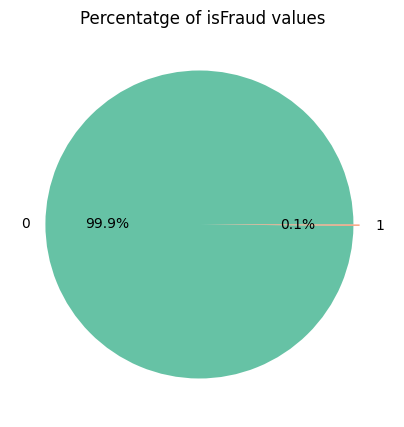

In [11]:
pie_plot(df['isFraud'])

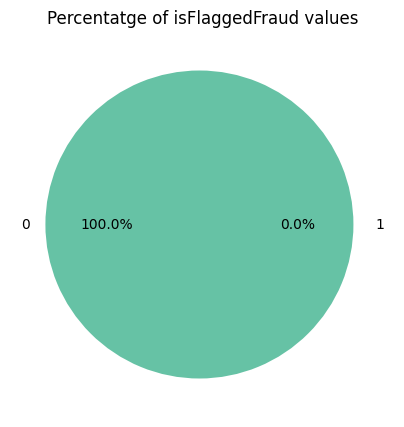

In [12]:
pie_plot(df['isFlaggedFraud'])

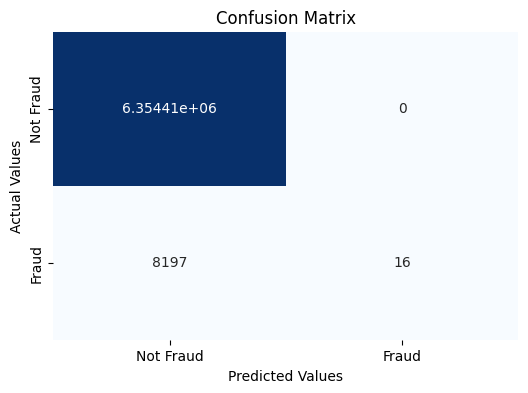

In [9]:
conf_matrix = confusion_matrix(df['isFraud'], df['isFlaggedFraud'])

# Mostrar la matriz de confusión usando seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['Not Fraud', 'Fraud'])
plt.yticks(ticks=[0.5, 1.5], labels=['Not Fraud', 'Fraud'])
plt.show()

In this scenario, the dataset exhibits a significant class imbalance, requiring careful handling.

Two critical aspects need consideration:

- False Positives: These occur when legitimate customers attempt transactions, yet the model incorrectly flags them as fraudulent. This may lead to customer dissatisfaction and potential loss of the customer.

- False Negatives: This category includes instances where fraudulent transactions are processed as legitimate by the model. Failing to identify such cases could result in financial losses for the customer or the merchant.

All transactions labelled as fraud were actually fraudulent

In [13]:
correctly_labelled_fraud = df.loc[(df.isFlaggedFraud == 0) & (df.isFraud ==1)]
correctly_labelled_fraud

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


Observations:

Most fraud transactions but not labelled as such have emptied the accounts. 

Here we can also see that some balances don't make sense and could explain different behaviours and patterns in fraudulent behaviour.

### Numerical features

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 3.34 µs


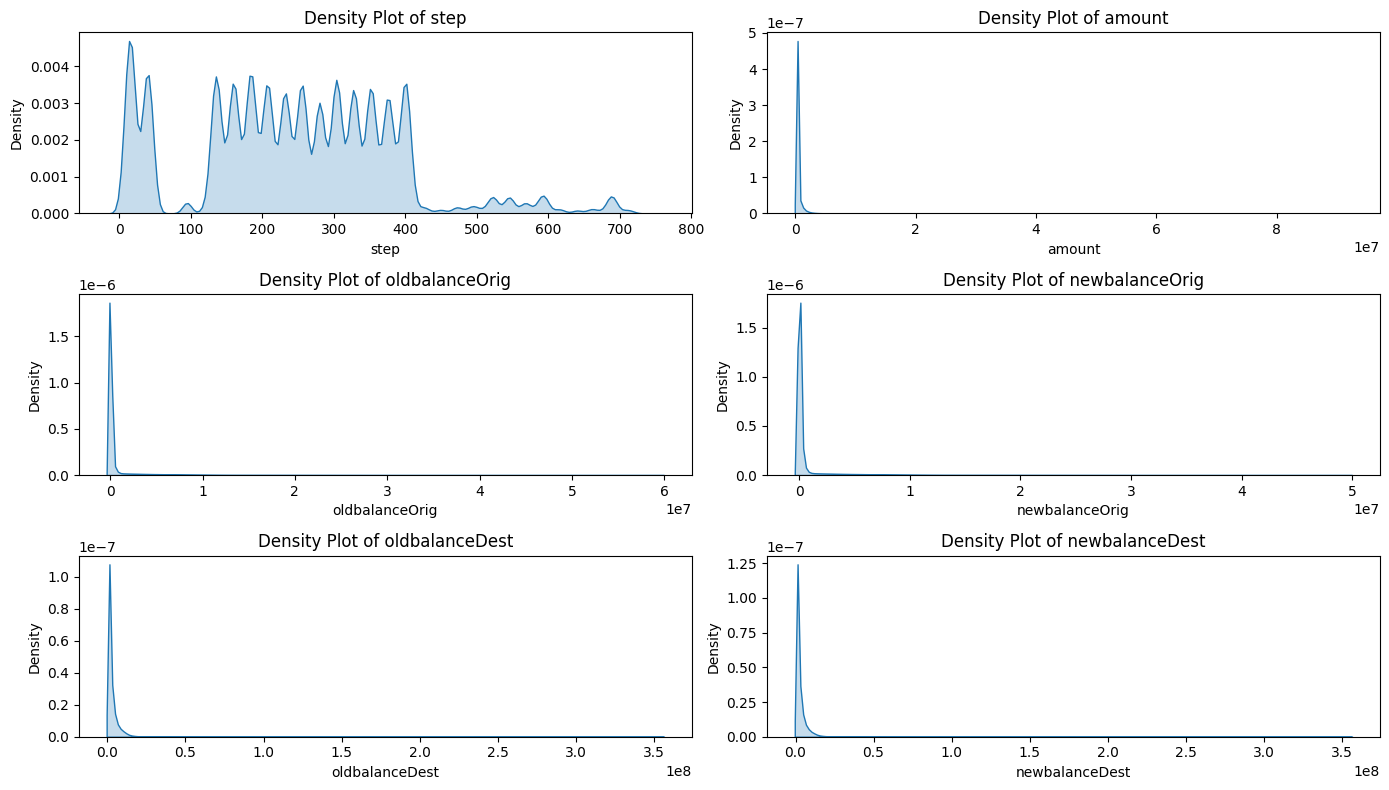

In [14]:
%time
numeric_cols =['step', 'amount','oldbalanceOrig', 'newbalanceOrig', 'oldbalanceDest','newbalanceDest']


fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14,8))
axes = axes.flatten()  

for ax, col in zip(axes, numeric_cols):
    sns.kdeplot(df[col], ax=ax, fill=True)
    ax.set_title(f'Density Plot of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Density')

plt.tight_layout()
plt.show()

In [17]:
skew_vals = df[numeric_cols].skew().reset_index()
skew_vals.columns = ['Feature', 'Skewness']


print("Skewness of numerical values")
print(skew_vals)

Skewness of numerical values
          Feature   Skewness
0            step   0.375177
1          amount  30.993949
2  oldbalanceOrig   5.249136
3  newbalanceOrig   5.176884
4  oldbalanceDest  19.921758
5  newbalanceDest  19.352302


Observations:

The columns 'amount','oldbalanceOrig', 'newbalanceOrig', 'oldbalanceDest','newbalanceDest' have most of the values slighty above 0. 

The column 'step' has  two ranges that look interesting and will be checked later more accurately.

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 3.81 µs


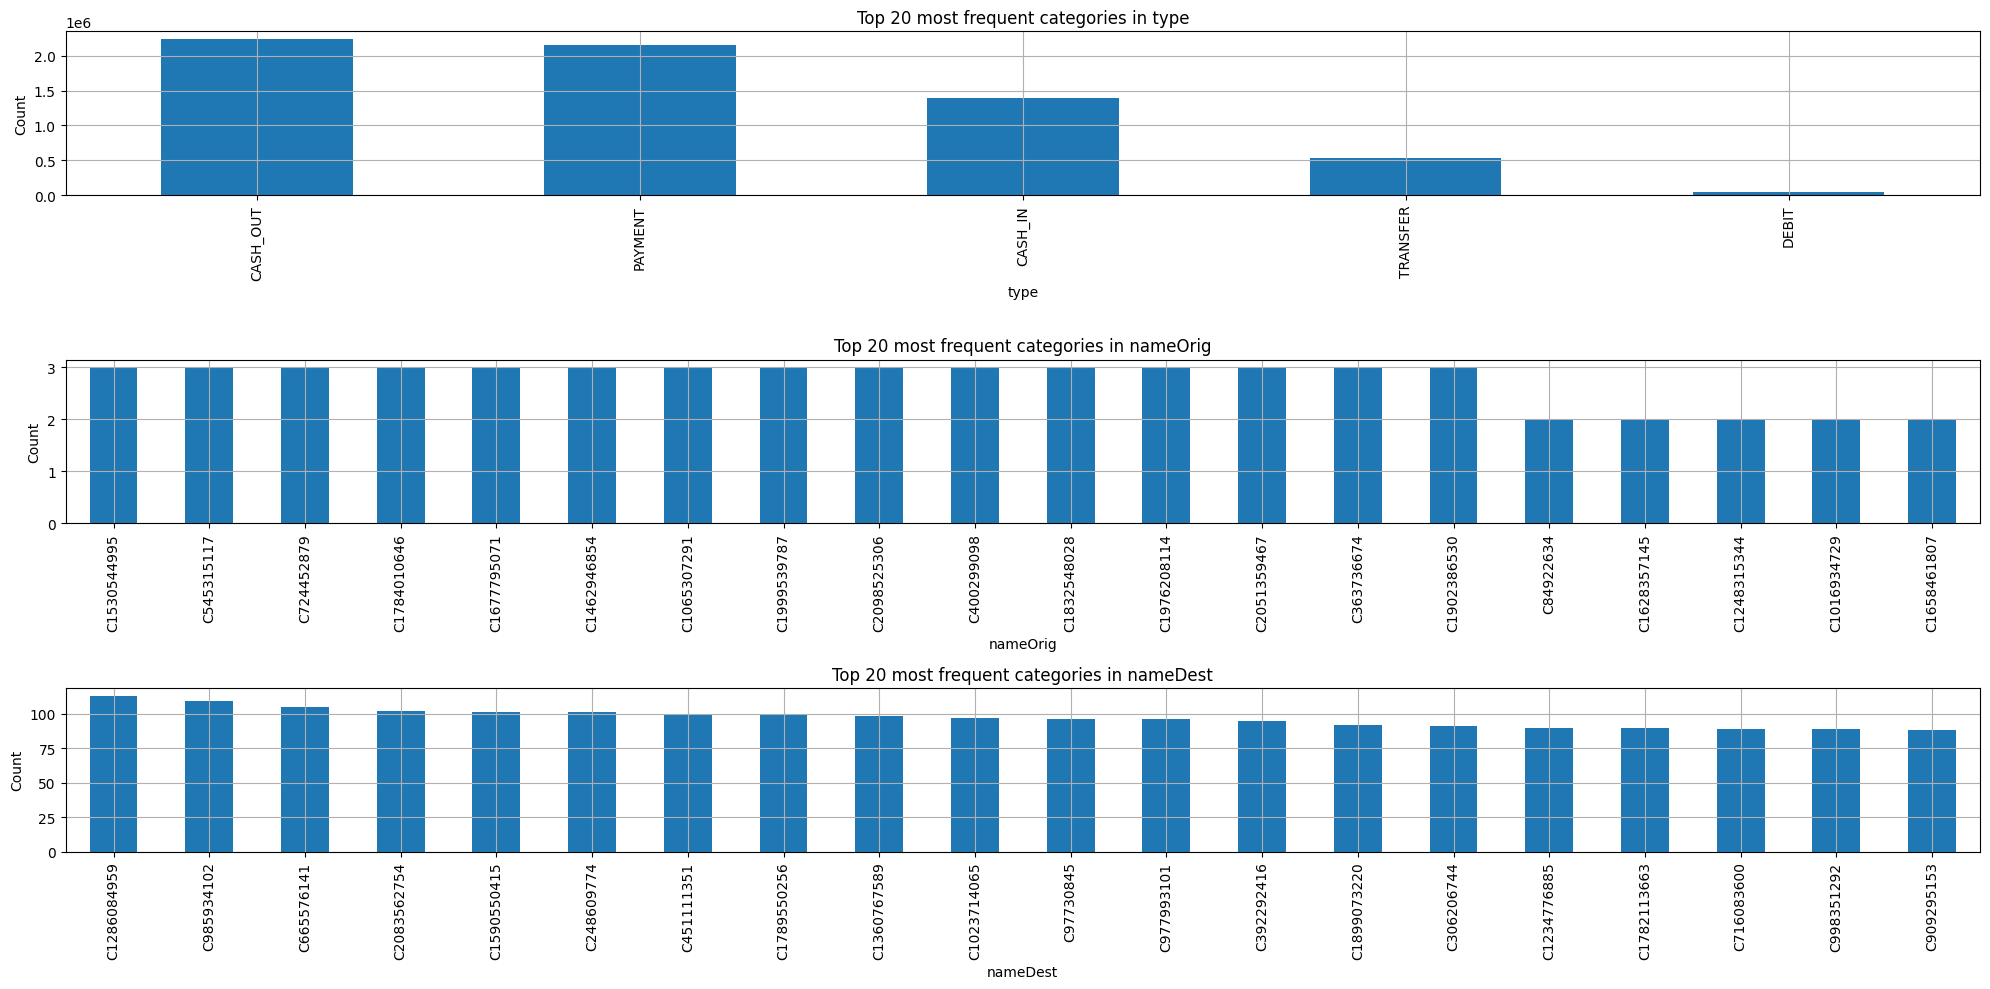

In [18]:
%time
categorical_cols = ['type', 'nameOrig', 'nameDest']

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(20, 10))

for ax, col in zip(axs, categorical_cols):
    top_categories = df[col].value_counts().nlargest(20)
    
    top_categories.plot(kind='bar', ax=ax)
    
    ax.set_title(f'Top 20 most frequent categories in {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.grid(True)

plt.tight_layout()
plt.show()

Observations:

- Most frequent types are cash-out and payments
- Both nameOrig and nameDest have repeated values that will be studied later.

### Correlation

In [ ]:
corr_df = df.copy()

for col in corr_df.columns:
    if corr_df[col].dtype == 'object':
        corr_df[col] = pd.factorize(corr_df[col])[0]
        print(f'The column to factorize is {col}, the number or unique values is : {corr_df[col].nunique()}')

corr = corr_df.corr(method = 'pearson')
plt.figure(figsize=(9, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm', annot_kws={"size": 8})
plt.show()


Observations: 

- Step - nameOrig = 0.96
- NewBalanceOrig - OldBalanceOrig = 1
- NewBalanceDest - OlbalanceDest = 0.98

There is high multicollinearity between these features. This issue will be managed later.


## Visualization of variables

### Step

In [ ]:
total_value_counts = df['step'].value_counts().sort_index()

fraud_df = df[df['isFraud'] == 1]
fraud_value_counts = fraud_df['step'].value_counts().sort_index()

non_fraud_df = df[df['isFraud'] == 0]
non_fraud_value_counts = non_fraud_df['step'].value_counts().sort_index()

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 20))

# Gráfico total de transacciones
axes[0].plot(total_value_counts.index, total_value_counts, marker='o', linestyle='-', color='#add8e6')
axes[0].set_title("Frequency of Steps in Total Transactions")
axes[0].set_xlabel("Step")
axes[0].set_ylabel("Frequency")
axes[0].grid(True)

# Gráfico de transacciones fraudulentas
axes[1].plot(fraud_value_counts.index, fraud_value_counts, marker='o', linestyle='-', color='#8B0000')
axes[1].set_title("Frequency of Steps in Fraudulent Transactions")
axes[1].set_xlabel("Step")
axes[1].set_ylabel("Frequency of Fraud")
axes[1].grid(True)

# Gráfico de transacciones no fraudulentas
axes[2].plot(non_fraud_value_counts.index, non_fraud_value_counts, marker='o', linestyle='-', color='#006400')
axes[2].set_title("Frequency of Steps in Non-Fraudulent Transactions")
axes[2].set_xlabel("Step")
axes[2].set_ylabel("Frequency of Non-Fraud")
axes[2].grid(True)

# Mostrar todos los gráficos
plt.tight_layout()
plt.show()

Observations:

Taking into consideration the fact that the dataset is very unbalanced we have to analyse these graphs with a grain of salt but there is a clear pattern that differentiates the behaviour between the fraudulent and the non-fraudulent transactions. 

Non-fraudulent transactions are mostly made in well defined step ranges and slow down when the step is > ~400. Fraudulent transactions stay constant along the step range.

A further analysis with more contextualized data could give us some insights about the importance of the steps in the process and the behaviour of fraudsters.

### Type

In [ ]:
   
pie_plot(df['type'])

In [ ]:
# Which are fraud among every category
fraud_types = df.groupby(['type', 'isFraud'], observed=False).size().reset_index(name='count')
total_transactions = fraud_types.groupby('type', observed = True)['count'].sum().reset_index(name='total')
count_data = fraud_types.merge(total_transactions, on='type')
count_data['fraud_rate(%)'] = (count_data['count'] / count_data['total'])*100
count_data

Observations: 

The percentatge related to each type is very low. We only have two types : CASH_OUT and TRANSFER that contain Fraud transactions. Those are two cases that could be investigated in order to find solutions for future security improvements.

### Amount

In [ ]:
zero_amount_df = df.loc[df['amount'] == 0]
zero_amount_df

Observations:

Withrawals with amount = 0 are fraudulent. We could analyze the origin and destination users and see their behaviour. One example could be using the postal code or the IP to map and cluster them.

In [ ]:
random_user_df = df.loc[df['nameDest'] == 'C1696624817']
random_user_df

In [ ]:
random_user_df = df.loc[df['nameOrig'] == 'C312737633']
random_user_df

In [ ]:
# Create categories for different ranges 
bins = [0, 1000, 10000, 100000, 1000000, 10000000]
labels = ['0-1000', '1000-10000', '10000-100000', '100000-1000000', '1000000-10000000', '10000000-100000000']

df['amount_range'] = pd.cut(df['amount'], bins=bins, labels=labels, right=False)
df.head()

In [ ]:

count_data = df.groupby(['amount_range', 'isFraud'], observed=True).size().reset_index(name='count')
total_transactions = count_data.groupby('amount_range', observed = True)['count'].sum().reset_index(name='total')
count_data = count_data.merge(total_transactions, on='amount_range')
fraud_transactions = count_data[count_data['isFraud'] == 1]
df_fraud = fraud_transactions.copy()
df_fraud['fraud_rate'] = (df_fraud['count'] / df_fraud['total'])*100
df_fraud

Observations: 

The biggest ranges have a higher fraud_rate
- 100000-1000000 = 0.14 %
- 1000000-10000000 = 1.93 %

In [ ]:
subset_df = df.loc[(df['amount_range'] == '1000000-10000000') & (df['isFraud'] == 1)]

subset_df

### Overview of the balances

In [ ]:
df_balance = df[['type', 'amount', 'oldbalanceOrig', 'newbalanceOrig', 'oldbalanceDest','newbalanceDest', 'isFraud', 'isFlaggedFraud']].copy()
df_balance = df_balance.loc[df_balance['type'] == 'TRANSFER']
df_balance

#### Balances in the origin

In [ ]:
subset_orig = df[['type', 'amount', 'oldbalanceOrig', 'newbalanceOrig', 'isFraud', 'isFlaggedFraud']].copy()
subset_orig['amount_moved'] = (subset_orig['oldbalanceOrig'] - subset_orig['newbalanceOrig']).round(2)
subset_orig = subset_orig.loc[subset_orig['amount'] != subset_orig['amount_moved']]
subset_orig

#### Potential losses in origin

In [ ]:
fraud_transactions = subset_orig[subset_orig['isFraud'] == 1]
fraud_transactions

Observations:

The fraudsters were aware of the account balance and transferred the whole amount maybe? I don't understand how they could have done it but it's an interesting behaviour that could be further investigated

#### Balances in the destination

In [ ]:
subset_dest = df[['type', 'amount', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']].copy()
subset_dest['amount_moved'] = (subset_dest['newbalanceDest'] - subset_dest['oldbalanceDest']).round(2)
subset_dest = subset_dest.loc[subset_dest['amount'] != subset_dest['amount_moved']]
subset_dest

#### Potential losses in the destination

In [ ]:
fraud_transactions = subset_dest[subset_dest['isFraud'] == 1]
fraud_transactions

Further investigation can be done here. Amounts don't match and there can be some patterns hidden related to user. Other features I would consider important are features related to location and time 

In [ ]:
grouped = df.groupby(['amount_range', 'isFraud'], observed = False).size().unstack(fill_value=0)

sns.barplot(data=grouped.reset_index(), x='amount_range', y=0, color='blue', label='Not Fraud')
sns.barplot(data=grouped.reset_index(), x='amount_range', y=1, color='red', label='Fraud')

plt.xlabel('Amount Range')
plt.ylabel('Count')
plt.title('Distribution of Transactions by Amount Range')
plt.xticks(rotation=45)
plt.legend(title='isFraud')
plt.show()

In [ ]:
sns.kdeplot(df['amount'], fill=True)
plt.title('Density Plot of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Density')
plt.show()

### nameOrig

In [ ]:
df['nameOrig'].value_counts().sum()

In [ ]:
unique_names = df['nameOrig'].unique()
total_origin = df['nameOrig'].value_counts().sum()
print(f'total unique origin names: {total_origin - len(unique_names)}')
print(unique_names)

Observations:

We only have unique names for origin so this column is not useful unless we could link it to a location, postal code or any other feature that would allow us to cluster them

### nameDest

In [ ]:
df['nameDest'].value_counts().sum()

In [ ]:
name_dest_counts = df['nameDest'].value_counts().reset_index()
name_dest_counts.columns = ['nameDest', 'Count']
name_dest_counts
filtered_name_dests = name_dest_counts[name_dest_counts['Count'] > 1]['nameDest']

# Paso 3: Filtrar el DataFrame original para incluir solo las filas con los 'nameDest' seleccionados
filtered_df = df[df['nameDest'].isin(filtered_name_dests)]
filtered_df

In [ ]:
fraud_df = filtered_df[filtered_df['isFraud'] == 1]
fraud_df

In [ ]:
fraud_df = filtered_df[filtered_df['nameDest'] == 'C288665596']
fraud_df.head()

Observations: 

Repeated nameDest, frequently used accounts are not fraud

### Viz Amount - Fraud

In [ ]:
bins = [0, 1000, 10000, 100000, 1000000, 10000000]
labels = ['0-1000', '1000-10000', '10000-100000', '100000-1000000', '1000000-10000000']

# Crear una nueva columna con las etiquetas de los rangos
df['amount_range'] = pd.cut(df['amount'], bins=bins, labels=labels, right=False)
df

In [ ]:
count_data = df.groupby(['amount_range', 'isFraud']).size().reset_index(name='count')
plt.figure(figsize=(10, 6))
sns.barplot(data=count_data, x='amount_range', y='count', hue='isFraud')

plt.title('Cantidad de valores por rango de monto dividido por isFraud')
plt.xlabel('Rango de monto')
plt.ylabel('Cantidad')
plt.legend(title='isFraud', loc='upper right')

plt.show()


### Viz Transaction type - Fraud

### Confusion matrix